In [1]:
# Google Colabで動かす場合
!pip install extra_keras_datasets

In [2]:
# 🚩 Step:1-1
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
import extra_keras_datasets.emnist as emnist

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Dropout

%matplotlib inline

In [3]:
# 主要パッケージのバージョン
def show_version(pkg):
    print("{0:20}: {1}".format(pkg.__name__, pkg.__version__))


# 🚩 Step:1-2
show_version(np)
show_version(matplotlib)
show_version(tf)
show_version(keras)

numpy               : 1.19.0
matplotlib          : 3.3.0
tensorflow          : 2.2.0
tensorflow.keras    : 2.3.0-tf


In [4]:
# 🚩 Step:1-3
# EMNIST-Lettersのデータをロード(初回はダウンロードに数分かかる)
(t_images, t_labels), (v_images, v_labels) = emnist.load_data(type="letters")

t_images    : uint8, (124800, 28, 28)
t_labels    : uint8, (124800,)
v_images    : uint8, (20800, 28, 28)
v_labels    : uint8, (20800,)


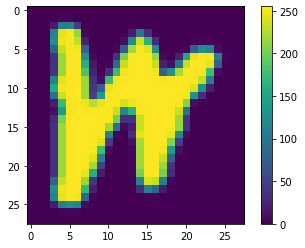

In [5]:
# 取得データの形状を確認
def show_data_info(label, data):
    print("{:12}: {}, {}".format(label, data.dtype, data.shape))


# Matplotlib 3.3.0より前のimshow互換用 (h,w,1)→(h,w)
def compatible_image(img):
    if img.ndim == 3 and img.shape[2] == 1:
        img = img.reshape(img.shape[0], img.shape[1])
    return img


# 取得データ画像のサンプル表示
def show_image(img):
    plt.rcParams["font.size"] = 10
    plt.figure()
    plt.imshow(compatible_image(img))
    plt.colorbar()
    plt.grid(False)
    plt.show()


# 🚩 Step:1-4
show_data_info("t_images", t_images)
show_data_info("t_labels", t_labels)
show_data_info("v_images", v_images)
show_data_info("v_labels", v_labels)
show_image(t_images[0])

In [6]:
# データ形式を4次元データ (batch, height, width, channel)に変換
# 各ピクセルの情報も0..255から0..1の範囲にノーマライズ
def adjust_image(img):
    img = img.astype("float32")
    img = img / 255.0
    img = img.reshape(-1, 28, 28, 1)  # 3D→4D
    return img


# 🚩 Step:1-5
t_images = adjust_image(t_images)
v_images = adjust_image(v_images)

t_images    : float32, (124800, 28, 28, 1)
v_images    : float32, (20800, 28, 28, 1)


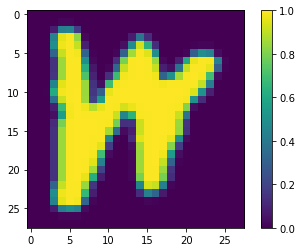

In [7]:
show_data_info("t_images", t_images)
show_data_info("v_images", v_images)
show_image(t_images[0])

In [8]:
# 🚩 Step:1-6
# モデル構築
# 畳み込み、プーリング、ドロップアウトの組み合わせで、最後は完全結合でsoftmaxでクラス分け
# 隠れ層の活性化関数には定番のReLUを使用
# TensorFlowを使う場合、最初の隠れ層だけ入力データの形式をinput_shapeで指定する必要がある
model = keras.Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation="relu", padding="same"),
        Conv2D(32, (5, 5), activation="relu", padding="same"),
        MaxPooling2D((2, 2), padding="same"),
        Dropout(0.4),
        Conv2D(64, (3, 3), activation="relu", padding="same"),
        Conv2D(64, (3, 3), activation="relu", padding="same"),
        Conv2D(64, (5, 5), activation="relu", padding="same"),
        MaxPooling2D((2, 2), padding="same"),
        Dropout(0.4),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.4),
        Dense(27, activation="softmax"),
    ]
)

# 🚩 Step:1-7
# モデルのコンパイル
opt = keras.optimizers.Adam()
loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

# モデルの概要
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        3

In [9]:
# 🚩 Step:1-8
# 教育データで訓練（GPUが利用できない場合は計算に時間がかかる）
history = model.fit(
    t_images,
    t_labels,
    epochs=20,
    batch_size=128,
    validation_data=(v_images, v_labels),
    verbose=2,
)

Epoch 1/20
975/975 - 6s - loss: 0.6501 - accuracy: 0.8004 - val_loss: 0.2181 - val_accuracy: 0.9260
Epoch 2/20
975/975 - 6s - loss: 0.2898 - accuracy: 0.9077 - val_loss: 0.1846 - val_accuracy: 0.9390
Epoch 3/20
975/975 - 6s - loss: 0.2463 - accuracy: 0.9201 - val_loss: 0.1717 - val_accuracy: 0.9410
Epoch 4/20
975/975 - 6s - loss: 0.2204 - accuracy: 0.9280 - val_loss: 0.1684 - val_accuracy: 0.9435
Epoch 5/20
975/975 - 6s - loss: 0.2057 - accuracy: 0.9324 - val_loss: 0.1612 - val_accuracy: 0.9460
Epoch 6/20
975/975 - 6s - loss: 0.1931 - accuracy: 0.9357 - val_loss: 0.1556 - val_accuracy: 0.9481
Epoch 7/20
975/975 - 6s - loss: 0.1849 - accuracy: 0.9372 - val_loss: 0.1573 - val_accuracy: 0.9476
Epoch 8/20
975/975 - 6s - loss: 0.1781 - accuracy: 0.9393 - val_loss: 0.1547 - val_accuracy: 0.9482
Epoch 9/20
975/975 - 6s - loss: 0.1706 - accuracy: 0.9419 - val_loss: 0.1568 - val_accuracy: 0.9486
Epoch 10/20
975/975 - 6s - loss: 0.1670 - accuracy: 0.9425 - val_loss: 0.1488 - val_accuracy: 0.9508

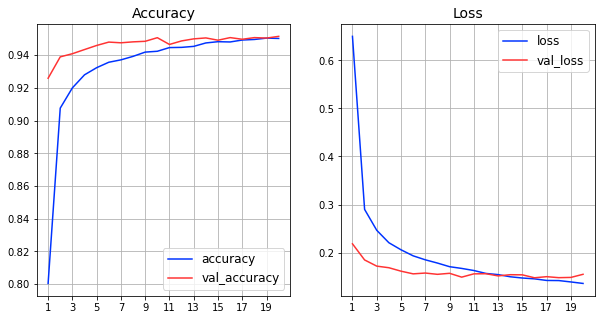

In [10]:
# エポックごとの学習結果の推移を確認
# TensorBoardを使えば、更に色々な情報を確認できる
def show_history(history):
    plt.rcParams["font.size"] = 10
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    t_col = "#03F"
    v_col = "#F33"

    ax[0].set_title("Accuracy", fontsize=14)
    ax[0].plot(history.history["accuracy"], color=t_col, label="accuracy")
    ax[0].plot(history.history["val_accuracy"], color=v_col, label="val_accuracy")
    ax[1].set_title("Loss", fontsize=14)
    ax[1].plot(history.history["loss"], color=t_col, label="loss")
    ax[1].plot(history.history["val_loss"], color=v_col, label="val_loss")

    x_pos = np.arange(0, len(history.epoch), 2)
    for x in ax:
        x.set_xticks(x_pos)
        x.set_xticklabels(x_pos + 1)
        x.grid(True)
        x.legend(fontsize=12)

    plt.show()


# 🚩 Step:1-9
show_history(history)

In [11]:
# 🚩 Step:1-10
# 学習済みモデルの保存（HDF5形式）
model.save("data/emnist-model.h5")